<a href="https://colab.research.google.com/github/tallis-andrade/Deep-Learning/blob/main/Pratica4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
from sklearn.model_selection import train_test_split

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1000
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)

In [ ]:
data = noisy_moons[0]
label = noisy_moons[1]

X_train, X_test, y_train, y_test = train_test_split(data, label, random_state=0)

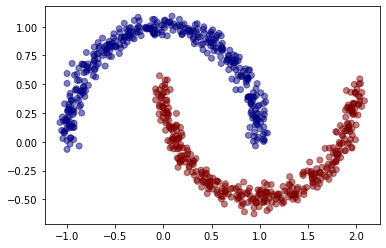

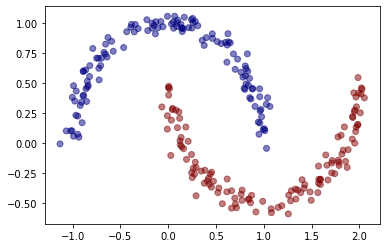

In [ ]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train , alpha=0.5, cmap='jet')
plt.show()

plt.scatter(X_test[:,0], X_test[:,1], c=y_test , alpha=0.5, cmap='jet')
plt.show()

### Meia-luas

In [ ]:
class myCallback(tf.keras.callbacks.Callback):

  def on_epoch_end(self, epoch, logs={}):

    if(logs.get('accuracy')>0.99):

      print("\nAtingiu accuracy > 0.99, Atingiu valor esperado...")
      
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train/255.0
X_test  = X_test/255.0

model = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(512, activation=tf.nn.relu),
 tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2014 - accuracy: 0.9413
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0790 - accuracy: 0.9761
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0517 - accuracy: 0.9839
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0389 - accuracy: 0.9880
Epoch 5/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.0277 - accuracy: 0.9906
Atingiu accuracy > 0.99, Atingiu valor esperado...
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0276 - accuracy: 0.9906


### Círculos

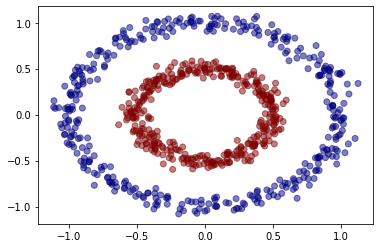

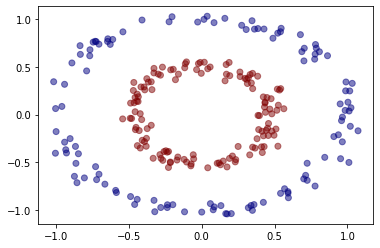

In [ ]:
data = noisy_circles[0]
label = noisy_circles[1]

X_train, X_test, y_train, y_test = train_test_split(data, label, random_state=0)

plt.scatter(X_train[:,0], X_train[:,1], c=y_train , alpha=0.5, cmap='jet')
plt.show()

plt.scatter(X_test[:,0], X_test[:,1], c=y_test , alpha=0.5, cmap='jet')
plt.show()

In [ ]:
class myCallback(tf.keras.callbacks.Callback):

  def on_epoch_end(self, epoch, logs={}):

    if(logs.get('accuracy')>0.99):

      print("\nAtingiu accuracy > 0.99, Atingiu valor esperado...")
      
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train/255.0
X_test  = X_test/255.0

model = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(512, activation=tf.nn.relu),
 tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2007 - accuracy: 0.9416
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0811 - accuracy: 0.9750
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0512 - accuracy: 0.9840
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0356 - accuracy: 0.9886
Epoch 5/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.0279 - accuracy: 0.9915
Atingiu accuracy > 0.99, Atingiu valor esperado...
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0279 - accuracy: 0.9915
